# NAME     : Bhavik Ransubhe
# CLASS    : B.E (B) COMPUTER
# ROLL No. : 41261

## MLDS 
### Assignment No. 3 : Implement basic Logic Gates using Hebbnet neural networks

## Implementation of Logic Gates using Hebbnet

In [1]:
import numpy as np 
from random import randint

In [2]:
#inputs 

X=np.array([[1,1,1],[1,-1,1],[-1,1,1],[-1,-1,1]])
#output
Y_ad=np.array([[1],[-1],[-1],[-1]])
Y_o=np.array([[1],[1],[1],[-1]])

In [3]:
print('input is:')
print(X)
print('output for And Gate is: ')
print(Y_ad)
print('output for Or Gate is: ')
print(Y_ad)
weights_ad=np.zeros((3))
weights_o=np.zeros((3))
print(weights_ad)

input is:
[[ 1  1  1]
 [ 1 -1  1]
 [-1  1  1]
 [-1 -1  1]]
output for And Gate is: 
[[ 1]
 [-1]
 [-1]
 [-1]]
output for Or Gate is: 
[[ 1]
 [-1]
 [-1]
 [-1]]
[0. 0. 0.]


In [4]:
# update weight for and gate /logic
def update_weight_ad(X,Y,weights):
    for i in range(4):
         
        weights=weights+X[i]*Y[i]
        
        #print weights
        slope =-(weights[0]/weights[1])
        c=-(weights[2]/weights[0])
        if slope<0 and weights[0]>0:
            weights_main=weights
        
    return weights_main
            
def update_weight_o(X,Y,weights):
    for i in range(4):
         
        weights=weights+X[i]*Y[i]
        
        #print weights
        slope =-(weights[0]/weights[1])
        c=-(weights[2]/weights[0])
        if slope<0 and weights[0]>0:
            weights_main=weights
        
    return weights_main
        
        
    
weights_ad=update_weight_ad(X,Y_ad,weights_ad)
weights_o=update_weight_o(X,Y_o,weights_o)

C:\Users\bhavi\.Origin\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\bhavi\.Origin\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


In [5]:
print('Checking after learning selecting a input')
rand_int=1 
#int(raw_input('Enter the test case no you want to try'))
print('Select a logic you also want  to check')
logicgate='A' #other option is "O"
print(weights_ad)
print('selected input is %d '%rand_int)
print(X[rand_int])
def check_learning(X,weights,rand_int):
    Yin=0
    for i in range(3):
        Yin+=X[rand_int,i]*weights[i]
    if Yin<0:
        Yin=-1
    else:
        Yin=1
    return Yin


if logicgate=='a' or logicgate=='A':
    weights_in=weights_ad
else:
    weights_in=weights_o
Yin=check_learning(X,weights_in,rand_int)
print(Yin)

Checking after learning selecting a input
Select a logic you also want  to check
[ 2.  2. -2.]
selected input is 1 
[ 1 -1  1]
-1


## Logic Gates using ANN

In [6]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# Sigmoid Function
def sigmoid(z):
	return 1 / (1 + np.exp(-z))

In [8]:
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
	W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
	W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
	b1 = np.zeros((neuronsInHiddenLayers, 1))
	b2 = np.zeros((outputFeatures, 1))
	
	parameters = {"W1" : W1, "b1": b1,
				"W2" : W2, "b2": b2}
	return parameters

In [9]:
# Forward Propagation
def forwardPropagation(X, Y, parameters):
	m = X.shape[1]
	W1 = parameters["W1"]
	W2 = parameters["W2"]
	b1 = parameters["b1"]
	b2 = parameters["b2"]

	Z1 = np.dot(W1, X) + b1
	A1 = sigmoid(Z1)
	Z2 = np.dot(W2, A1) + b2
	A2 = sigmoid(Z2)

	cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
	logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
	cost = -np.sum(logprobs) / m
	return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
	m = X.shape[1]
	(Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
	
	dZ2 = A2 - Y
	dW2 = np.dot(dZ2, A1.T) / m
	db2 = np.sum(dZ2, axis = 1, keepdims = True)
	
	dA1 = np.dot(W2.T, dZ2)
	dZ1 = np.multiply(dA1, A1 * (1- A1))
	dW1 = np.dot(dZ1, X.T) / m
	db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
	
	gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
				"dZ1": dZ1, "dW1": dW1, "db1": db1}
	return gradients


In [10]:
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
	parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
	parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
	parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
	parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
	return parameters

In [11]:
# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

In [12]:
# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
	losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
	gradients = backwardPropagation(X, Y, cache)
	parameters = updateParameters(parameters, gradients, learningRate)


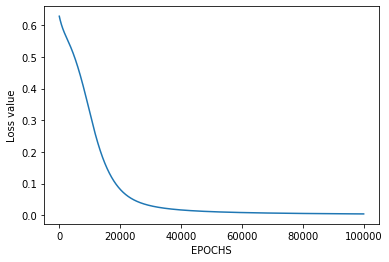

In [13]:
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [14]:
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

[[0. 1. 0. 0.]]
